In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv("New_161_data_Strain_rate_SRO_yield.csv")

In [30]:
df.head()

,Fe-Fe (SRO),Fe-Ni (SRO),Cr-Fe (SRO),Co-Fe (SRO),Al-Fe (SRO),Ni-Ni (SRO),Cr-Ni (SRO),Co-Ni (SRO),Al-Ni (SRO),Cr-Cr (SRO),Co-Cr (SRO),Al-Cr (SRO),Co-Co (SRO),Al-Co (SRO),Al-Al(SRO),Yield Stress (GPa)
0,-0.180247,0.092438,0.146759,0.144797,-1.239506,-0.052160,-0.040123,-0.010935,0.087037,-0.104938,-0.079277,0.560494,-0.060519,0.215520,0.881481,11.0897
1,-0.165432,0.116821,0.168673,0.132988,-1.148663,-0.032407,-0.067593,-0.020606,0.061728,-0.098457,-0.094136,0.526749,-0.040732,0.170903,0.910837,10.4649
2,-0.168827,0.097222,0.195525,0.147868,-1.049383,-0.020988,-0.056944,-0.010756,-0.004409,-0.145370,-0.097550,0.479277,-0.057262,0.157180,0.901738,10.2925
3,-0.166975,0.102623,0.223302,0.151427,-1.003086,-0.035494,-0.079938,0.005498,0.010417,-0.145370,-0.105613,0.427469,-0.065297,0.133150,0.880401,9.7913
4,-0.159877,0.121142,0.209722,0.155814,-0.916667,-0.038272,-0.070988,-0.000498,-0.024691,-0.154938,-0.102449,0.388889,-0.066148,0.110359,0.847584,9.5492


In [31]:
df.describe()

,Fe-Fe (SRO),Fe-Ni (SRO),Cr-Fe (SRO),Co-Fe (SRO),Al-Fe (SRO),Ni-Ni (SRO),Cr-Ni (SRO),Co-Ni (SRO),Al-Ni (SRO),Cr-Cr (SRO),Co-Cr (SRO),Al-Cr (SRO),Co-Co (SRO),Al-Co (SRO),Al-Al(SRO),Yield Stress (GPa)
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.007929,0.094683,0.119702,0.154558,-0.399406,-0.008865,-0.006125,0.054740,-0.074152,-0.114590,-0.003854,0.098184,-0.066485,-0.083204,0.549015,5.657821
std,0.099764,0.071746,0.107981,0.078817,0.309362,0.077452,0.076587,0.097108,0.111144,0.078717,0.103062,0.169589,0.117946,0.245754,0.224381,4.774138
min,-0.180247,-0.086420,-0.110494,0.000000,-1.282716,-0.266156,-0.173855,-0.198560,-0.369602,-0.326474,-0.178043,-0.228060,-0.314421,-0.842328,0.125933,0.689600
25%,-0.052516,0.054401,0.000000,0.111715,-0.551041,-0.051036,-0.064043,-0.014947,-0.125209,-0.169213,-0.083186,0.000000,-0.147302,-0.172215,0.353116,1.334050
50%,0.000000,0.102469,0.165432,0.162512,-0.378389,-0.019444,0.000000,0.025729,-0.086393,-0.133025,-0.014620,0.053139,-0.053243,-0.038582,0.502812,4.439550
75%,0.082407,0.137114,0.203627,0.208572,-0.193742,0.015413,0.054037,0.135180,-0.024369,-0.059293,0.066668,0.153622,-0.012614,0.060840,0.771015,9.560100
max,0.226543,0.241049,0.264815,0.309414,0.300000,0.196914,0.151852,0.275018,0.368519,0.100617,0.288066,0.587037,0.261449,0.529453,0.933227,18.926900


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
# Split the data into features (X) and target variable (y)
X = df.drop('Yield Stress (GPa)', axis=1)  # Assuming 'HV' is the target variable
y = df['Yield Stress (GPa)']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
random_forest_reg = RandomForestRegressor(
    n_estimators=150,        # Increase trees
    max_depth=10,             # Limit depth
    min_samples_split=2,     # Require more samples to split
    min_samples_leaf=2,      # Ensure leaf size
    max_features='sqrt',     # Limit features per split
    random_state=42
)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=150, random_state=42)

In [37]:
# Make predictions on the test set
y_pred = random_forest_reg.predict(X_test)

Text(0, 0.5, 'Predicted Y')

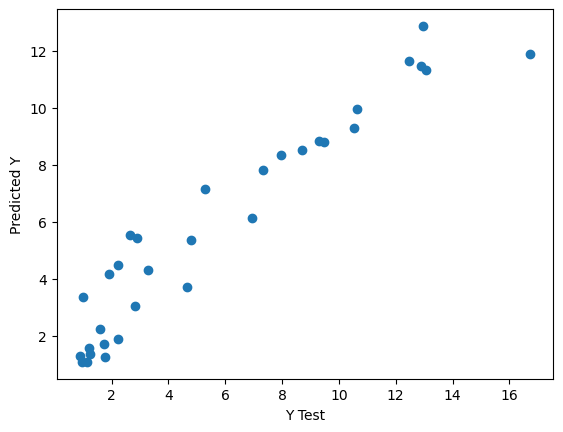

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

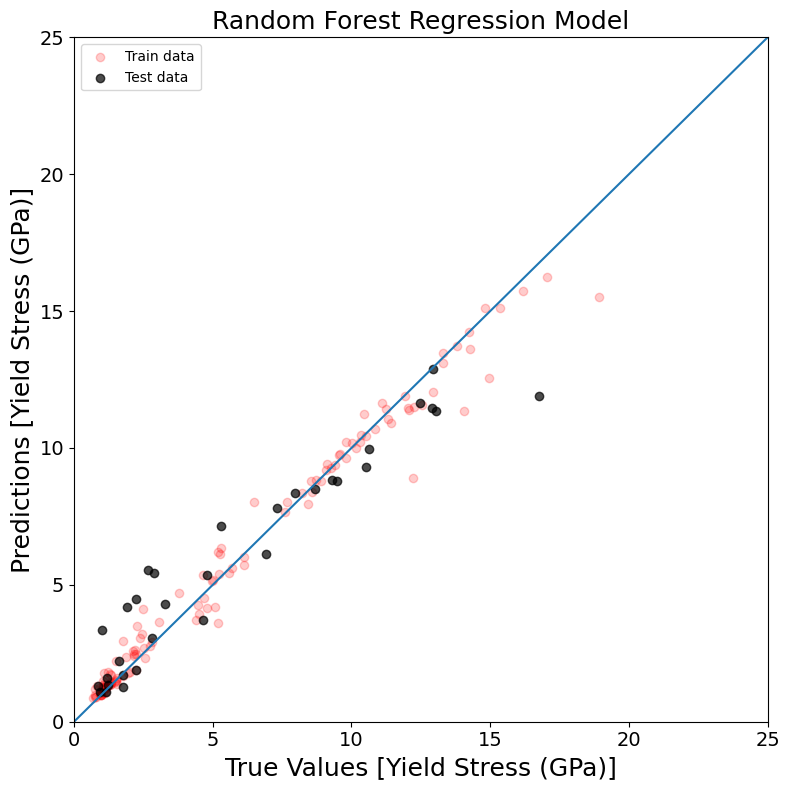

In [39]:
test_predictions = random_forest_reg.predict( X_test)
train_predictions =random_forest_reg.predict( X_train)

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18)
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18)
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
# Set the tick parameters
plt.xticks(fontsize=14)  # Adjust the fontsize value as needed
plt.yticks(fontsize=14)  # Adjust the fontsize value as needed

plt.legend(loc="upper left")
_ = plt.plot(lims, lims)
plt.title('Random Forest Regression Model', fontsize=18)

plt.tight_layout()  # Adjust layout for better appearance
plt.savefig('Random Forest Regression predict vs actual.png', dpi=300)  # Change file format and dpi as needed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


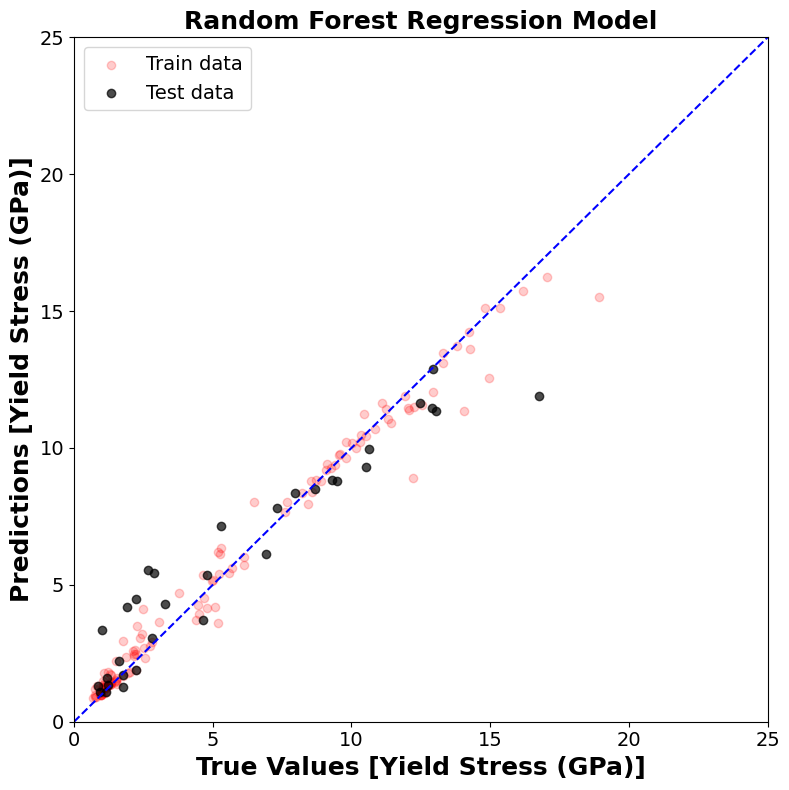

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Make EPS Illustrator-friendly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# Predictions
test_predictions = random_forest_reg.predict(X_test)
train_predictions = random_forest_reg.predict(X_train)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_train, train_predictions, c='red', alpha=0.2, label='Train data', marker='o')
plt.scatter(y_test, test_predictions, c='black', alpha=0.7, label='Test data', marker='o')

plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.title('Random Forest Regression Model', fontsize=18, fontweight='bold')

lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.plot(lims, lims, color='blue', linestyle='--')

plt.tight_layout()

# Save as EPS (Illustrator friendly)
plt.savefig('random_forest_actual_vs_predicted.eps', format='eps', bbox_inches='tight', pad_inches=0.02)

# Optional: also save as PNG for quick viewing
plt.savefig('random_forest_actual_vs_predicted.png', dpi=300)

plt.show()





In [40]:
# Check lengths after splitting
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Train)': y_train,
    'Predicted (Train)': train_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Random Forest train predicted_actual_values.xlsx', index=False)

Length of X_train: 128
Length of y_train: 128


In [41]:
# Check lengths after splitting
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Test)': y_test,
    'Predicted (Test)': test_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Random Forest test predicted_actual_values.xlsx', index=False)

Length of X_test: 32
Length of y_test: 32


In [42]:
# calculate these metrics by hand!
from sklearn import metrics


mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('NRMSE:', nrmse)

MAE: 1.0438075725438913
MSE: 2.20438657061772
RMSE: 1.4847176737069308
NRMSE: 0.09353023608792446


In [43]:
from sklearn.metrics import r2_score

# Assuming 'predictions' is the predicted values and 'Y_test' is the true values
r2_value_train = r2_score(y_train, train_predictions)
r2_value_test = r2_score(y_test, test_predictions)

# Print or use the R-squared value
print(f'R-squared value of train data: {r2_value_train}')
print(f'R-squared value of test data: {r2_value_test}')

R-squared value of train data: 0.9778852525118784
R-squared value of test data: 0.8944915205504008


In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [22]:
# Assuming df is your DataFrame
# Splitting into features (X) and target (y)
X = df.drop('Yield Stress (GPa)', axis=1)
y = df['Yield Stress (GPa)']


In [23]:
random_forest_reg = RandomForestRegressor(
    n_estimators=300,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=2,   # Minimum samples needed to split an internal node
    min_samples_leaf=2,    # Minimum samples needed to be at a leaf node
    max_features='sqrt',   # Number of features to consider at each split
    random_state=42
)


In [24]:
# Create a KFold object for 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

test_r2_scores = []
train_r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []


In [25]:
for train_index, test_index in kf.split(X):
    # 1. Split the data for this fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # 2. Fit the model on the training fold
    random_forest_reg.fit(X_train_fold, y_train_fold)
    
    # 3. Predict on both the training and test fold
    y_train_pred_fold = random_forest_reg.predict(X_train_fold)
    y_test_pred_fold = random_forest_reg.predict(X_test_fold)
    
    # 4. Calculate metrics
    # Train R²
    train_r2 = r2_score(y_train_fold, y_train_pred_fold)
    # Test R²
    test_r2 = r2_score(y_test_fold, y_test_pred_fold)
    # MAE (test)
    mae = mean_absolute_error(y_test_fold, y_test_pred_fold)
    # MSE (test)
    mse = mean_squared_error(y_test_fold, y_test_pred_fold)
    # RMSE (test)
    rmse = np.sqrt(mse)
    
    # 5. Store them in the lists
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)


In [26]:
print("Train R² for each fold:", train_r2_scores)
print("Test R² for each fold:", test_r2_scores)
print("MAE for each fold:", mae_scores)
print("MSE for each fold:", mse_scores)
print("RMSE for each fold:", rmse_scores)

print("\nAverage Train R²:", np.mean(train_r2_scores))
print("Average Test R²:", np.mean(test_r2_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))


Train R² for each fold: [0.9727767539850002, 0.9712941965055348, 0.9670926907787026, 0.9734388293572971, 0.9766303766238583]
Test R² for each fold: [0.8877062640724068, 0.9387487304197834, 0.9419935739398012, 0.87219662926932, 0.8465888519152537]
MAE for each fold: [1.0671825287472074, 0.7554809441805423, 0.8338186277669599, 0.9740765831455168, 1.0819445105674412]
MSE for each fold: [2.3461507997708084, 1.3396515017496462, 1.608343746483853, 2.2696772668528835, 3.6428665065116994]
RMSE for each fold: [np.float64(1.5317149864680466), np.float64(1.1574331521732244), np.float64(1.268204930791492), np.float64(1.5065448107682968), np.float64(1.9086294838212312)]

Average Train R²: 0.9722465694500787
Average Test R²: 0.897446809923313
Average MAE: 0.9425006388815337
Average MSE: 2.241337964273778
Average RMSE: 1.4745054728044582


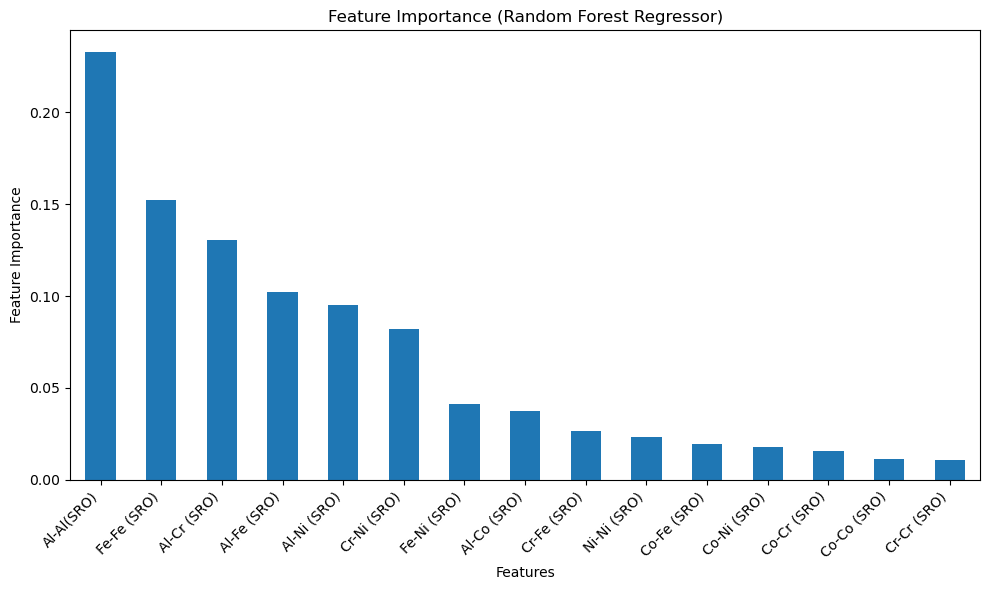

Feature Importance Scores:
Al-Al(SRO)     0.233005
Fe-Fe (SRO)    0.152469
Al-Cr (SRO)    0.130714
Al-Fe (SRO)    0.102207
Al-Ni (SRO)    0.095199
Cr-Ni (SRO)    0.082360
Fe-Ni (SRO)    0.041124
Al-Co (SRO)    0.037655
Cr-Fe (SRO)    0.026718
Ni-Ni (SRO)    0.023060
Co-Fe (SRO)    0.019679
Co-Ni (SRO)    0.017902
Co-Cr (SRO)    0.015906
Co-Co (SRO)    0.011230
Cr-Cr (SRO)    0.010773
dtype: float64


In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("New_161_data_Strain_rate_SRO_yield.csv")
# Split the data into features (X) and target variable (y)
X = df.drop('Yield Stress (GPa)', axis=1)
y = df['Yield Stress (GPa)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the Random Forest model with all 15 features
random_forest_reg = RandomForestRegressor(
    n_estimators=300,        # Increase trees
    max_depth=10,            # Limit depth
    min_samples_split=2,     # Require more samples to split
    min_samples_leaf=2,      # Ensure leaf size
    max_features='sqrt',     # Limit features per split
    random_state=42
)
random_forest_reg.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.Series(random_forest_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importance values
print("Feature Importance Scores:")
print(feature_importance)